## Predicting House Prices in Ames Iowa using Regression

Data Set from the House Prices: Advance Regression Techniques competition on Kaggle: 
[link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

	
Overview:
	
The data was provided as train.csv (with house prices), and test.csv (new observations with all the same features as train.csv, but missing the Sale Price. 
Train.CSV has 81 columns including ID and SalePrice whereas Test.CSV has only 80 columns without SalePrice field which We need to predict.
	
 **Approach:**

Cleaned/processed train.csv and test.csv together. Performed manual feature removal/alteration based on detailed reading of the data description file. Obtained feature list using AIC minimization method and applied this list in model development with no changes.
Processed the train.csv dataset, performed feature engineering by a number of methods and optimized model hyperparameters  performed a stacking algorithm of different models based on train/test optimization, and created the final csv file for Kaggle submission.

**Repository Contents:**
Please find my GIT repository link where all my work for this project is checkedin.
[link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
	
Data Set Study & Findings:
This project has been completed by thoroughly studying the data a sort of gaining Domain Knowledge about majority of the fields possible.
The data set has these many fields:
		          
`Id       MSSubClass	MSZoning	LotFrontage	LotArea	Street	Alley	LotShape	LandContour	Utilities	LotConfig	LandSlope	Neighborhood	Condition1	Condition2	BldgType	HouseStyle	OverallQual	OverallCond	YearBuilt	YearRemodAdd	RoofStyle	RoofMatl	Exterior1st	Exterior2nd	MasVnrType	MasVnrArea	ExterQual	ExterCond	Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1	BsmtFinSF1	BsmtFinType2	BsmtFinSF2	BsmtUnfSF	TotalBsmtSF	Heating	HeatingQC	CentralAir	Electrical	1stFlrSF	2ndFlrSF	LowQualFinSF	GrLivArea	BsmtFullBath	BsmtHalfBath	FullBath	HalfBath	BedroomAbvGr	KitchenAbvGr	KitchenQual	TotRmsAbvGrd	Functional	Fireplaces	FireplaceQu	GarageType	GarageYrBlt	GarageFinish	GarageCars	GarageArea	GarageQual	GarageCond	PavedDrive	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch	ScreenPorch	PoolArea	PoolQC	Fence	MiscFeature	MiscVal	MoSold	YrSold	SaleType	SaleCondition	SalePrice`
	
	


###  EDA

In [158]:
import pandas as pd
import numpy as np
import math
import os
os.chdir("C:/Users/anjumm/OneDrive - Baxter/Training/Data Science/ML")

# let's read both the files train and test
amestraindf = pd.read_csv('train.csv', index_col=0)
amestestdf = pd.read_csv('test.csv', index_col=0)

# check the rows and columns in each data frame
print(amestraindf.shape, amestestdf.shape) 

## Note: 
##(1460, 80) (1459, 79), please note ID column we converted as index while reading the dataframe from both the files, 
##so total of 80 fields now.

# concat both the dataframes now
# before concatnenating them, lets; create the SalePrice columns in the test dataframe with 0 values.
amestestdf['SalePrice'] = 0
amesdf = pd.concat([amestraindf, amestestdf], axis=0)
print(amesdf.shape)
##Note:
##(2919, 80)  (1460 rows from train and 1459 rows from test, so total of 2919 rows in the concatenated datafrmae )


# now let's check th dtypes of the dataframe. It has object , int64 as well as float64 dtypes.
amesdf.dtypes.unique()  


## let's check the qualitative and quantitaive fields and their respective count.
qualitative = amesdf.select_dtypes(include='object').columns
##len(qualitative)  # out of 80 columns in the dataframe, 43 are of Qualitative types(categorical)
qualitative.sort_values()
qualitative =[ 'Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
               'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
               'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
               'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
               'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
               'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
               'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
               'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
               'SaleType', 'Street', 'Utilities' ]
## Note:
## so 43 qualitative fields, total of 80 fields.
## Now based on the study of the data thoroughly, futher out of 43 qualitative,28 categorical and 15 oridinal(sort of rank)
## so finally, 43 quantitative, 19 categorical, 18 ordinal


ordinal =    ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2', 'HeatingQC',  'KitchenQual','FireplaceQu', 
               'GarageQual', 'GarageCond','GarageFinish', 'PoolQC', 'Fence' ]

categorical = [ 'Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
                'Electrical', 'Exterior1st', 'Exterior2nd',
                'Foundation', 'Functional', 'GarageType', 'Heating', 'HouseStyle', 
                'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 
                'MiscFeature', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
               'SaleType', 'Street', 'Utilities' ]


quantitative = amesdf.select_dtypes(exclude='object').columns
## len(quantitative)  # out of 80 columns in the dataframe, 37 are of Quanitative types(numeric)
quantitative  = [ '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold' ]



(1460, 80) (1459, 79)
(2919, 80)


### Handling missing or NA values

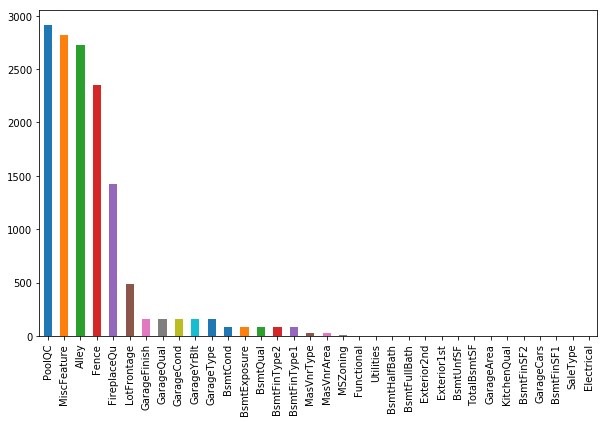

In [121]:
## Now let's check the missing and NA values
import matplotlib.pyplot

missing = amesdf.isna().sum().sort_values(ascending=False)
missing[missing>0].plot(kind="bar", figsize=(10,6))
len(missing[missing>0]) # total 34 fields have NA or missing values in the dataframe.
# missing[missing>0].index
missingcols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
               'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageType',
               'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
               'MasVnrType', 'MasVnrArea', 'MSZoning', 'Functional', 'Utilities',
               'BsmtHalfBath', 'BsmtFullBath', 'Exterior2nd', 'Exterior1st',
               'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'KitchenQual', 'BsmtFinSF2',
               'GarageCars', 'BsmtFinSF1', 'SaleType', 'Electrical']

##Note:
## so out of 34 fields, few are quantitaive( numerical) and few are qualitative(catergorical or ordinal)
## so we will handle the missing values for each case differently.
# For most columns in the data set provided NA does not mean NA but indicates that feature does not exis.

missing_categorical = ['MiscFeature', 'Alley' , 'GarageType', 'MasVnrType', 'MSZoning', 
                       'Functional','Utilities', 'Exterior2nd', 'Exterior1st', 'Electrical' , 'SaleType']
amesdf[missing_categorical].isna().sum()

#             # MiscFeature    2814
#             # Alley          2721
#             # GarageType      157
#             # MasVnrType       24
#             # MSZoning          4
#             # Functional        2
#             # Utilities         2
#             # Exterior2nd       1
#             # Exterior1st       1
#             # Electrical        1
## Note:
## from the above output, on studying the dataset, we extrapolate that 'MSZoning', 'Functional', 'Utilities', 'Exterior2nd', 'Exterior1st', 'Electrical'
## having na values does not mean "No" rather they should be substituted with some true values.
## SO "missing _categorical" can be further divided into 2 sets:

missing_categorical_NAtoNO =    [ 'MiscFeature', 'Alley' , 'GarageType', 'MasVnrType' ]

missing_categorical_NAtoValue = ['MSZoning', 'Functional','Utilities', 'Exterior2nd', 'Exterior1st', 'Electrical','SaleType']

missing_ordinal =               ['PoolQC', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                                'BsmtCond','BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'KitchenQual' ]

missing_quantitative =          ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath',
                                  'BsmtUnfSF' , 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2','GarageCars' ]



In [122]:
# Now let's handle ordinal, categorical and missing or NA values

# for missing_categorical_NAtoNO  fields, will replace NA with 'No'
for col in missing_categorical_NAtoNO:
    amesdf[col] = amesdf[col].fillna('No')
# now check if categoricals has yet any missing value.
amesdf[missing_categorical_NAtoNO].isna().sum()

# for missing_categorical_NAtoValue  fields, will replace NA with different values.
# so lets' replace NA for these fileds with maxvalue in the dataset i.e.
#                 'Electrical' - 'SBrkr'
#                 'MSZoning' - 'RL'
#                 'Utilities' - 'AllPub'
#                 'Functional' - 'Typ'
#                 'Exterior1st' - 'VinylSd'
#                 'Exterior2nd' - 'VinylSd'
#                 'SaleType'    - "WD"


for cols in missing_categorical_NAtoValue:
    maxvalue = amesdf[cols].value_counts().index[0]
#     print(maxvalue)
    amesdf[cols] = amesdf[cols].fillna(maxvalue)
# now check if they has yet any missing value.
amesdf[missing_categorical_NAtoValue].isna().sum()


# MasVnrType & GarageType has some values as "None" , so let's convert it to "No"
amesdf["MasVnrType"] = amesdf["MasVnrType"].replace('None', 'No')

# now lets confirm how many fields are yet to be handled for missing or na values.
amesdf.isna().sum()[amesdf.isna().sum()>0]  # This returns nothing but "missing_ordinal"
amesdf.isna().sum()[amesdf.isna().sum()>0].sort_values(ascending=False)

# so now time to handle missing values for ordinal
# also to convert the all ordinal columns  from string to numeric values.
# from above, we know ordinal are total 15 columns out of which 13 have missing values as pasted below.


ordinal =        ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                  'BsmtFinType2', 'HeatingQC',  'KitchenQual','FireplaceQu', 
                  'GarageQual', 'GarageCond','GarageFinish', 'PoolQC', 'Fence' ]

missing_ordinal= ['PoolQC', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                  'BsmtCond','BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'KitchenQual', 'SaleType' ]

amesdf["ExterQual"] = amesdf['ExterQual'].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['1','2','3','4','5'])
amesdf["ExterQual"] = amesdf["ExterQual"].astype('int64')
print(amesdf["ExterQual"])

amesdf["ExterCond"] = amesdf['ExterCond'].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['1','2','3','4','5'])
amesdf["ExterCond"] = amesdf["ExterCond"].astype('int64')


amesdf["HeatingQC"] = amesdf['HeatingQC'].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['1','2','3','4','5'])
amesdf["HeatingQC"] = amesdf["HeatingQC"].astype('int64')


amesdf["PoolQC"] = amesdf['PoolQC'].replace([np.nan, 'Fa', 'TA', 'Gd', 'Ex'], ['0','1','2','3','4'])
amesdf["PoolQC"] = amesdf["PoolQC"].astype('int64')

amesdf["Fence"] = amesdf['Fence'].replace([np.nan, 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], ['0','1','2','3','4'])
amesdf["Fence"] = amesdf["Fence"].astype('int64')

amesdf["FireplaceQu"] = amesdf['FireplaceQu'].replace([np.nan, 'Po','Fa', 'TA', 'Gd', 'Ex'], ['0','1','2','3','4', '5'])
amesdf["FireplaceQu"] = amesdf["FireplaceQu"].astype('int64')


amesdf["GarageFinish"] =  amesdf["GarageFinish"].replace([np.nan, "Unf", "RFn", "Fin"], ['0','1','2','3'])
amesdf["GarageFinish"] = amesdf["GarageFinish"].astype("int64")

amesdf["GarageQual"] =  amesdf['GarageQual'].replace([np.nan, 'Po','Fa', 'TA', 'Gd', 'Ex'], ['0','1','2','3','4', '5'])
amesdf["GarageQual"] =  amesdf['GarageQual'].astype("int64")


amesdf["GarageCond"] =  amesdf['GarageCond'].replace([np.nan, 'Po','Fa', 'TA', 'Gd', 'Ex'], ['0','1','2','3','4', '5'])
amesdf["GarageCond"] =  amesdf['GarageCond'].astype("int64")

amesdf["BsmtCond"] =  amesdf['BsmtCond'].replace([np.nan, 'Po','Fa', 'TA', 'Gd', 'Ex'], ['0','1','2','3','4', '5'])
amesdf["BsmtCond"] =  amesdf['BsmtCond'].astype("int64")

amesdf["BsmtExposure"] =  amesdf['BsmtExposure'].replace([np.nan, 'No','Mn', 'Av', 'Gd'], ['0','1','2','3','4'])
amesdf["BsmtExposure"] =  amesdf['BsmtExposure'].astype("int64")

amesdf["BsmtQual"] =  amesdf['BsmtQual'].replace([np.nan, 'Po','Fa', 'TA', 'Gd', 'Ex'], ['0','1','2','3','4', '5'])
amesdf["BsmtQual"] =  amesdf['BsmtQual'].astype("int64")

amesdf["BsmtFinType1"] = amesdf['BsmtFinType1'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan],['6','5','4','3','2','1','0'])
amesdf["BsmtFinType1"] =  amesdf['BsmtFinType1'].astype("int64")

amesdf["BsmtFinType2"] = amesdf['BsmtFinType2'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan],['6','5','4','3','2','1','0'])
amesdf["BsmtFinType2"] =  amesdf['BsmtFinType2'].astype("int64")

amesdf["KitchenQual"] = amesdf['KitchenQual'].replace([np.nan, 'Po','Fa', 'TA', 'Gd', 'Ex'], ['0','1','2','3','4', '5'])
amesdf["KitchenQual"] =  amesdf['KitchenQual'].astype("int64")



Id
1       4
2       3
3       4
4       3
5       4
6       3
7       4
8       3
9       3
10      3
11      3
12      5
13      3
14      4
15      3
16      3
17      3
18      3
19      3
20      3
21      4
22      3
23      4
24      3
25      3
26      4
27      3
28      4
29      3
30      3
31      3
32      3
33      4
34      3
35      5
36      4
37      3
38      3
39      3
40      3
41      3
42      3
43      3
44      3
45      3
46      5
47      4
48      4
49      3
50      3
51      3
52      3
53      2
54      4
55      3
56      3
57      4
58      4
59      5
60      3
61      3
62      3
63      4
64      3
65      3
66      4
67      3
68      4
69      3
70      4
71      3
72      3
73      3
74      3
75      4
76      3
77      3
78      3
79      3
80      3
81      3
82      3
83      3
84      3
85      3
86      4
87      4
88      4
89      2
90      3
91      3
92      3
93      3
94      3
95      3
96      5
97      4
98      3
99      3
100    

In [123]:
# Now let's check if any of the oridinal columns have nan or missing values.Also see if they are all integerstype now.
# So form below code, we can say all ordinals are now

print(amesdf[missing_ordinal].isna().sum())
print(amesdf[missing_categorical].isna().sum())
print(amesdf[ordinal].dtypes)
print(amesdf[categorical].dtypes)
print(amesdf[quantitative].dtypes)


PoolQC          0
Fence           0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtCond        0
BsmtExposure    0
BsmtQual        0
BsmtFinType2    0
BsmtFinType1    0
KitchenQual     0
SaleType        0
dtype: int64
MiscFeature    0
Alley          0
GarageType     0
MasVnrType     0
MSZoning       0
Functional     0
Utilities      0
Exterior2nd    0
Exterior1st    0
Electrical     0
SaleType       0
dtype: int64
ExterQual       int64
ExterCond       int64
BsmtQual        int64
BsmtCond        int64
BsmtExposure    int64
BsmtFinType1    int64
BsmtFinType2    int64
HeatingQC       int64
KitchenQual     int64
FireplaceQu     int64
GarageQual      int64
GarageCond      int64
GarageFinish    int64
PoolQC          int64
Fence           int64
dtype: object
Alley            object
BldgType         object
CentralAir       object
Condition1       object
Condition2       object
Electrical       object
Exterior1st      object
Exterior2nd      object
Foundation       

In [124]:
# let's handle missing or na values for  numerical or quantitative fields.
amesdf[missing_quantitative].isna().sum()
            # LotFrontage     486
            # GarageYrBlt     159
            # MasVnrArea       23
            # BsmtHalfBath      2
            # BsmtFullBath      2
            # BsmtUnfSF         1
            # TotalBsmtSF       1
            # GarageArea        1
            # BsmtFinSF1        1
            # BsmtFinSF2        1
            # GarageCars        1
# garagecars missing value will be replaced by the most frequent number used i.e. 2
amesdf["GarageCars"] = amesdf["GarageCars"].fillna(2)

# garagearea missing value will be replaced by the most frequent number used i.e. its mean 
amesdf["GarageArea"] = amesdf["GarageArea"].fillna(amesdf["GarageArea"].mean())

# GarageYrBlt has too much of odd data year starting from 1895, we will replace with median.
amesdf["GarageYrBlt"] = amesdf["GarageYrBlt"].fillna( amesdf["GarageYrBlt"].median()).astype('int64')

# BsmtFinSF1 and BsmtFinS21, BsmtUnfSF , TotalBsmtSF ,BsmtHalfBath, BsmtFullBath  none means no basement, so can be repalced with 0
amesdf["BsmtFinSF1"] = amesdf["BsmtFinSF1"].fillna(0)
amesdf["BsmtFinSF2"] = amesdf["BsmtFinSF1"].fillna(0)
amesdf["BsmtUnfSF"] = amesdf["BsmtUnfSF"].fillna(0)
amesdf["TotalBsmtSF"] = amesdf["TotalBsmtSF"].fillna(0)
amesdf["BsmtHalfBath"] = amesdf["BsmtHalfBath"].fillna(0)
amesdf["BsmtFullBath"] = amesdf["BsmtFullBath"].fillna(0)
amesdf["MasVnrArea"] = amesdf["MasVnrArea"].fillna(0)
amesdf["LotFrontage"] = amesdf["LotFrontage"].fillna(0)

# lets checl if there is still any na or missing
amesdf[missing_quantitative].isna().sum()



LotFrontage     0
GarageYrBlt     0
MasVnrArea      0
BsmtHalfBath    0
BsmtFullBath    0
BsmtUnfSF       0
TotalBsmtSF     0
GarageArea      0
BsmtFinSF1      0
BsmtFinSF2      0
GarageCars      0
dtype: int64

## Feature Engineering

In [125]:
## lets print the dataframe shape
print(amesdf.shape)
# GarageCond, GarageQual and GarageFin can be combined to get a garage score by taking theri mean.
# will drop the orignal columns after that
amesdf['GarageScore'] = (amesdf['GarageQual'] + amesdf['GarageCond'] + amesdf['GarageFinish'])/3
amesdf.drop(['GarageQual', 'GarageCond', 'GarageFinish'], axis=1, inplace =True)

# let's take the mean of all Porch to create the totalporch and drop the original columns
amesdf['PorchSF'] = ( (amesdf['OpenPorchSF'] + amesdf['EnclosedPorch'] + amesdf['3SsnPorch']+ amesdf['ScreenPorch']) /4 )
amesdf[["PorchSF","SalePrice"]].corr()


# now lets create a new field BsmntScore using bsmnt related fields.
amesdf['BsmntScore'] = (amesdf['BsmtQual'] + amesdf['BsmtCond'] + amesdf['BsmtExposure'])/3
amesdf.drop( ['BsmtQual' ,'BsmtCond', 'BsmtExposure'], axis=1, inplace=True )


# will create a score by using BsmtFinType1 - BsmtFinSF1 and BsmtFinType2 - BsmtFinSF2 and 
# also TotalBsmntSF area is sum of BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF, will drop BsmtUnfSF and TotalBsmntSF
# to handle divide by zero issue, I replaced 0 with 1 while using the below denominator 
amesdf['BsmntSFScore'] = (amesdf['BsmtFinType1']*amesdf['BsmtFinSF1'].values + amesdf['BsmtFinType2'].values*amesdf['BsmtFinSF2'].values) / (amesdf['BsmtFinSF1'].replace(0,1).values + amesdf['BsmtFinSF2'].replace(0,1).values)
amesdf.drop(["BsmtFinType1","BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF"], axis=1, inplace=True)



## As GrLivArea is sum of 1stFlrSF , 2ndFlrSF  and LowQualFinSF, so we can drop 1stFlrSF , 2ndFlrSF  and LowQualFinSF
amesdf.drop(["1stFlrSF","2ndFlrSF", "LowQualFinSF"], axis=1, inplace=True)


## lets create another columns TotalBath using all other bath fields.
amesdf['TotalBath'] = amesdf["BsmtFullBath"]+ amesdf["BsmtHalfBath"] + amesdf["FullBath"] + amesdf["HalfBath"]
amesdf.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)


# Convert year numbers to "Years since..." numbers
#'YearBuilt', 'YearRemodAdd','YrSold' by themselves do not mean much so let's conver them to how old it is.
    
amesdf["YearBuiltAgo"] = 2010-amesdf["YearBuilt"]
amesdf["YearRemodAddAgo"] = 2010-amesdf["YearRemodAdd"]
amesdf["YrSoldAgo"] = 2010-amesdf["YrSold"]
amesdf["GarageYrBltAgo"] = 2010-amesdf["GarageYrBlt"]
amesdf.drop (["YearBuilt","YearRemodAdd","YrSold","GarageYrBlt"], axis=1, inplace=True)

## let's convert SaleMonth (1-12) into Winter (12,1,2), Sprng(3,4,5), Summer(6,7,8), and Autumn (9,10,11)
## so "MoSold" will be converted from categorical to numerical
amesdf['MoSold'] = amesdf['MoSold'].replace([12,1,2,3,4,5,6,7,8,9,10,11], ['Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer',
                                                  'Summer', 'Autumn', 'Autumn', 'Autumn'])




(2919, 80)


### Get Dummies to convert all qualitative columns to numeric columns

In [126]:
pd.set_option('display.max.columns', 1000)

# we can check if there is any nan or missing value in the cleansed dataframe 
len(amesdf.isna().sum()[amesdf.isna().sum()>0])

# let's save it to csv to have a glance on the cleased data.
amesdf.to_csv("amesdf.csv", index=False)

# now total of 65 columns 2919 rows (1460 from train and 1459 from test data)
# now let's check how many qualitative and quantitative
amesdf.shape  
len(amesdf.select_dtypes(include='object').columns.sort_values()) # 29 qualitative
len(amesdf.select_dtypes(exclude='object').columns.sort_values()) # 36 quanitative


qualitative_cleaned =  amesdf.select_dtypes(include='object').columns.sort_values()
# lets convers the index to array
qualitative_cleaned = list(qualitative_cleaned.values)

quantitative_cleaned =   amesdf.select_dtypes(exclude='object').columns.sort_values()
# lets convers the index to array
quantitative_cleaned = list(quantitative_cleaned.values)


# now lets get the dummies to convert all categorical to numerical(dummies columns)
for cols in qualitative_cleaned:
    dummies =(pd.get_dummies(amesdf[cols], prefix=cols))
    amesdf = pd.concat([amesdf, dummies], 1)   
    amesdf= amesdf.drop(cols, axis=1)


# now lets check the total columns after converting all categorical into dummies(mumeirc)
##2919 rows , 228 columns now
amesdf.shape  


(2919, 229)

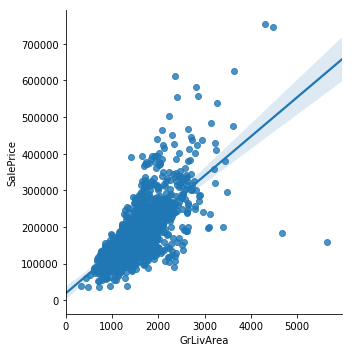

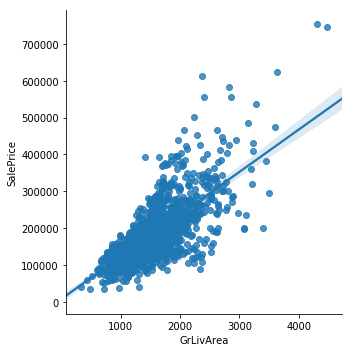

In [127]:
# lets check if it has all numeric or yet any object data type.It has no object type,so we are good with all numeric fields. reqd for machine learning.
amesdf.select_dtypes(include='object').columns

# let's check the correlations now.
amesdf.iloc[0:1460, :].corr()["SalePrice"].sort_values()

import seaborn as sns

# lets plot GrLivArea for the train data against Sale Price.
amesdf[["SalePrice","GrLivArea"]].iloc[0:1460, :].corr()
sns.lmplot(data= amesdf[["SalePrice","GrLivArea"]].iloc[0:1460, :], x="GrLivArea", y = 'SalePrice',  sharex=True)

# from the scatterplot, it is clear that two sales are outliers as it has very less price but the biggest square area.
amesdf[amesdf.GrLivArea >= 4500]["SalePrice"]
amesdf = amesdf.drop([524,1299], axis=0)

# so now check if the outlier are gone.
sns.lmplot(data= amesdf[["SalePrice","GrLivArea"]].iloc[0:1458, :], x="GrLivArea", y = 'SalePrice',  sharex=True)



In [11]:
amesdf.to_csv("../final.csv")

### Evaluating Models

In [128]:
# lets split the file separate the train and test data provided by kaggle.
# remmeber ,the train.csv had intitally 1460 so now, it is 1458 rows after deleting the 2 rows above.
# and test would contain 1459 as usual. so lets' split now and also drop Index label.
amesdftrain = amesdf.iloc[0:1458, :].reset_index(drop=True)
amesdftest = amesdf.iloc[1458:, :]

X_train = amesdftrain.drop("SalePrice", axis=1) 

from sklearn.preprocessing import RobustScaler
X_train_scaled = RobustScaler().fit_transform(X_train)


Y_train =  amesdftrain["SalePrice"]
Y_train.skew()   ### 1.881
# lets conver it to natural log.

Y_train = np.log1p(amesdftrain["SalePrice"])


Y_train.skew() 
# 0.121 reduced alot. so we will take this as depenedent variable and after preciting will convert them back to
# its original value by using exponential np.exp()
 
X_test = amesdftest.drop("SalePrice", axis=1) 
X_test_scaled = RobustScaler().fit_transform(X_test)

X_train_scaled.shape, X_test_scaled.shape



((1458, 228), (1459, 228))

In [170]:
amesdftest.shape

(1459, 229)

### Dimensional Reduction - PCA

Notice the code below shows .95 for the number of component parameters.It means that as per scikit learn choose the number of principle components such that 95% of the variance is retained and the 1st component itself is good enough to explain more than 95 %  i.e. 97.8 % of the variance as can be seen below.So we will not use this PCA rather will go ahead with its original data set.

In [66]:
from sklearn.decomposition import PCA
pca =PCA(228)
# pca =PCA(0.95)
pca.fit(X_train_scaled)

X_train_scaled_pca= pca.fit_transform(X_train_scaled)
X_test_scaled_pca= pca.fit_transform(X_test_scaled)


print(np.round(pca.explained_variance_ratio_*100, decimals=1) )
print(np.round(pca.components_, decimals=1) )
print(X_train_scaled_pca.shape, X_test_scaled_pca.shape)


[97.8  1.1  0.8  0.2  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0. 

In [75]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor , AdaBoostRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from datetime import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

linear = make_pipeline( RobustScaler(), LinearRegression() )
lasso = make_pipeline( RobustScaler(), Lasso() )
ridge  = make_pipeline( RobustScaler(), Ridge() )
elastic = make_pipeline( RobustScaler(), ElasticNet() )
decisiontree = make_pipeline( RobustScaler(), DecisionTreeRegressor() )
neighbors = make_pipeline( RobustScaler(), KNeighborsRegressor() ) 
svr  = make_pipeline( RobustScaler(), SVR() )
Extratree = make_pipeline( RobustScaler(), ExtraTreesRegressor() )
RandomForest = make_pipeline(RobustScaler(), RandomForestRegressor() )
AdaBoost = make_pipeline( RobustScaler(), AdaBoostRegressor() )
GradientBoost = make_pipeline( RobustScaler(), GradientBoostingRegressor() )
XGBoost =  make_pipeline( RobustScaler(), XGBRegressor() )      
LightGBM =  make_pipeline( RobustScaler(),  LGBMRegressor() )    
Stacking=StackingCVRegressor(regressors=
(linear, lasso, ridge, elastic, decisiontree, neighbors, svr, Extratree,RandomForest,AdaBoost, GradientBoost, XGBoost,
 LightGBM ), meta_regressor=XGBoost, use_features_in_secondary=True) 

model = {
    
         "linear":         linear  ,
         "lasso":          lasso  , 
         "ridge":          ridge   ,
         "elastic":        elastic ,
         "decisiontree":   decisiontree ,
         "neighbors":      neighbors     ,
         "SVR":             svr  ,        
         "ExtraTree":       Extratree  ,  
         "RandomForest":    RandomForest  ,
         "AdaBoost":        AdaBoost    ,  
         "GradientBoost":   GradientBoost,  
         "XGBBoost":        XGBoost    ,
         "LightGBM":        LightGBM ,
         "Stacking":       Stacking     
        
        }


score=[] 
algorithm = []                            
                             
                             
for index, model in model.items():
    rmse = np.mean(np.sqrt(-(cross_val_score(model, X_train.values, Y_train.values, cv=KFold(n_splits=10,shuffle=True, random_state=0), scoring="neg_mean_squared_error"))))
    score.append(rmse)
    algorithm.append(model)                                         
    print(index,"RMSE score {} ".format(rmse), datetime.now() )

print("minimum score is ", np.min(score))
                             



linear RMSE score 0.1229381343212607  2019-08-20 17:42:18.125097
lasso RMSE score 0.3931529347507243  2019-08-20 17:42:18.507595
ridge RMSE score 0.11965155626905122  2019-08-20 17:42:18.946527
elastic RMSE score 0.39204630865490525  2019-08-20 17:42:19.382219
decisiontree RMSE score 0.19971487444084146  2019-08-20 17:42:20.032920
neighbors RMSE score 0.22792722206018495  2019-08-20 17:42:21.025792
SVR RMSE score 0.1866788086197799  2019-08-20 17:42:24.065071
ExtraTree RMSE score 0.14672413967331804  2019-08-20 17:42:26.988783
RandomForest RMSE score 0.15097165435344814  2019-08-20 17:42:29.500079
AdaBoost RMSE score 0.17261581345481386  2019-08-20 17:42:34.396626
GradientBoost RMSE score 0.12931670835166414  2019-08-20 17:42:42.168580
XGBBoost RMSE score 0.12810051795327265  2019-08-20 17:42:48.153284
LightGBM RMSE score 0.12752601207142603  2019-08-20 17:42:51.347991
Stacking RMSE score 0.11920615254151827  2019-08-20 17:45:49.073759
minimum score is  0.11920615254151827


###  Finding the  right value of  model parameters - Hyperparameter Optimization

In [112]:
## let's use the GridSearch hyperparamter optimzation library to find the best prameter values of each algorithm.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.simplefilter('ignore')

X_train_scaled  = RobustScaler().fit_transform(X_train)

## lets create a dictionary with all models and their respective parameter to be tuned.
tuning = {
          Lasso() :      {'alpha':        [1,0.1,0.01,0.001,0.0001,1e-04,1e-05] , 
                         'max_iter' :    [100,500, 1000, 1500, 2000, 2500, 3000]
                         },
          Ridge() :      {'alpha':        [0.1,1, 10,  50, 100, 200, 500, 1000] ,
                         'max_iter' :     [100,500, 1000, 1500, 2000, 2500, 3000]
                         },
          ElasticNet() :     {'alpha':       [1,0.1,0.01,0.001,0.0001,1e-04,1e-05] ,
                            'max_iter' :     [100,500, 1000, 1500, 2000, 2500, 3000]
            
                             },
          DecisionTreeRegressor():   
                              {'max_depth' : [5, 7, 9, 11, 13, 15],
                              'min_samples_split' :  [2,3 ,4,5,6, 8, 10],
                              'min_samples_leaf'  :  [1,2,3 ,4,5,6, 8, 10],
                              'max_features'      :  ['auto', 'sqrt', 'log2']
                             },
          KNeighborsRegressor() : 
                            {'n_neighbors' : [1,2,3, 4 ,5 ,6 ,7 ,8, 9, 10],
                            'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                            'p'           : [1, 2]  ,
                             'n_jobs'     : [1,2, 3,4,5]
                            },
    
         SVR()     :     {
                        'kernel' :      ['linear', 'poly', 'rbf', 'sigmoid'],
                        'C'      :      [1, 2, 3,4 ,5],
                        'epsilon':      [0.001, 0.01,0.5 ,0.1,1.0, 1.5, 2.0],
                        'max_iter' :    [100,300,500, 1000, 1500, 2000, 2500, 3000]  
                        },

        ExtraTreesRegressor() :   { 'n_estimators' :     [100 ,500 ,1000 ,1500 ,2000, 2500, 3000 ,3500],
                           'max_depth' :        [4 ,5 ,6 ,7 ,8, 9, 10,11, 12],
                          'min_samples_split' : [2,3 ,4,5 ,6 ,7 ,8, 9, 10],
                          'min_samples_leaf'  : [1,2,3 ,4,5 ,6 ,7 ,8, 9, 10],
                          'max_features'      : ['auto', 'sqrt', 'log2']
                         },
                          
       RandomForestRegressor() :  
                          {'n_estimators' :      [100 ,500 ,1000 ,1500 ,2000, 2500, 3000, 3500],
                          'max_depth' :         [4 ,5 ,6 ,7 ,8, 9, 10,11, 12],
                          'min_samples_split' : [2,3 ,4,5 ,6 ,7 ,8, 9, 10],
                          'min_samples_leaf'  : [1,2,3 ,4,5 ,6 ,7 ,8, 9, 10],
                          'max_features'      : ['auto', 'sqrt', 'log2']
                           } ,   
       AdaBoostRegressor() : 
                            {
                            'learning_rate':      [0.001, 0.005, 0.01, 0.05, 0.1],
                            'n_estimators' :      [100 ,500 ,1000 ,1500 ,2000, 2500, 3000, 3500],
                            'loss'         :      ['linear', 'square','exponential']
                            },
                
        GradientBoostingRegressor() :   
                            {
                          'learning_rate':      [0.001, 0.005, 0.01, 0.05, 0.1],
                          'n_estimators' :      [100 ,500 ,1000 ,1500 ,2000, 2500, 3000, 3500],
                          'max_depth' :         [4 ,5 ,6 ,7 ,8, 9, 10,11, 12],
                          'min_samples_split' : [2,3 ,4,5 ,6 ,7 ,8, 9, 10],
                          'min_samples_leaf'  : [1,2,3 ,4,5 ,6 ,7 ,8, 9, 10],
                          'max_features'      : ['auto', 'sqrt', 'log2']
                            }   ,
          
         XGBRegressor():    { 'learning_rate' :[0.001, 0.005, 0.01, 0.05, 0.1],
                              'n_estimators' : [100 ,500 ,1000 ,1500 ,2000, 2500, 3000, 3500]
                  
                            },
          LGBMRegressor():  { 'learning_rate' :[0.001, 0.005, 0.01, 0.05, 0.1],
                               'n_estimators' : [100 ,500 ,1000 ,1500 ,2000, 2500, 3000, 3500]
            
                             }                
          
          
         }

   
     
for key ,val in tuning.items():
#     grid = GridSearchCV(estimator=key, param_grid=val)  
    grid = RandomizedSearchCV(estimator=key, param_distributions=val, n_iter=10, random_state=7)
    grid.fit(X_train_scaled, Y_train)
    print(grid.best_score_, grid.best_params_,)
   


0.9027536508450712 {'n_estimators': 3000, 'learning_rate': 0.01}
0.8921586077267801 {'n_estimators': 1000, 'learning_rate': 0.01}


### Evalutaing models again with tuned hyperparameters

In [114]:

linear = make_pipeline( RobustScaler(), LinearRegression() )

lasso = make_pipeline(  RobustScaler(), Lasso(alpha = 0.001, max_iter = 500) )

ridge  = make_pipeline(  RobustScaler(), Ridge(alpha = 10, max_iter = 300) )

elastic = make_pipeline(  RobustScaler(), ElasticNet(alpha = 0.001, max_iter = 500) )

decisiontree = make_pipeline(  RobustScaler(), DecisionTreeRegressor(max_depth=7, max_features= 'auto', min_samples_leaf =8, min_samples_split= 3) )

neighbors = make_pipeline(  RobustScaler(), KNeighborsRegressor(algorithm= 'auto', leaf_size= 20, n_neighbors= 4, p= 1, n_jobs=2) ) 

svr  = make_pipeline(  RobustScaler(), SVR(kernel='rbf', C= 3, epsilon= 0.01, max_iter = 2500) )

Extratree = make_pipeline(  RobustScaler(), ExtraTreesRegressor(n_estimators= 100, min_samples_split= 4, min_samples_leaf= 4, max_features= 'auto', max_depth = 10) )

RandomForest = make_pipeline( RobustScaler(), RandomForestRegressor(n_estimators=100, min_samples_split = 4, min_samples_leaf= 4, max_features = 'auto', max_depth= 10) )

AdaBoost = make_pipeline(  RobustScaler(), AdaBoostRegressor(n_estimators= 1000, loss= 'linear', learning_rate= 0.05) )

GradientBoost = make_pipeline(  RobustScaler(), GradientBoostingRegressor(n_estimators= 3500, min_samples_split= 8, min_samples_leaf = 6, max_features= 'sqrt', max_depth = 5, learning_rate= 0.05) )

XGBoost =  make_pipeline(  RobustScaler(), XGBRegressor(n_estimators=3000 , learning_rate=.01) )     

LightGBM =  make_pipeline( RobustScaler(), LGBMRegressor(n_estimators=1000 ,learning_rate = 0.01,random_state=0) )    

Stacking=StackingCVRegressor(regressors=
                      (lasso,  elastic, decisiontree, neighbors, svr, GradientBoost, XGBoost, LightGBM ),
                       meta_regressor=XGBoost,
                       use_features_in_secondary=True) 

model = {
    
         "linear":          linear  ,
         "lasso":           lasso  , 
         "ridge":           ridge   ,
         "elastic":         elastic ,
         "decisiontree":    decisiontree ,
         "neighbors":       neighbors     ,
         "SVR":             svr  ,        
         "ExtraTree":       Extratree  ,  
         "RandomForest":    RandomForest  ,
         "AdaBoost":        AdaBoost    ,  
         "GradientBoost":   GradientBoost,  
         "XGBBoost":        XGBoost  ,  
         "LightGBM":        LightGBM ,
         "Stacking":        Stacking     
        
        }


score=[] 
algorithm = []                            
                             
                             
for index, model in model.items():
    rmse = np.mean(np.sqrt(-(cross_val_score(model, X_train.values, Y_train.values, cv=KFold(n_splits=10,shuffle=True, random_state=0), scoring="neg_mean_squared_error"))))
    score.append(rmse)
    algorithm.append(model)                                         
    print(index,"RMSE score {:.4f} ".format(rmse), datetime.now() )

print("minimum score is {:.4f} ".format( np.min(score)) )
                             

# model	score
# ridge 	0.1168
# elastic 	0.1170
# lasso 	0.1185
# stacking	0.1195
# GradientBoost 	0.1199
# XGBBoost 	0.1219
# linear	0.1229
# LightGBM 	0.1259
# RandomForest 	0.1423
# ExtraTree 	0.1446
# AdaBoost 	0.1721
# SVR 	0.1768
# decisiontree 	0.1889
# neighbors 	0.2067




linear RMSE score 0.1229  2019-08-20 21:19:50.672730
lasso RMSE score 0.1185  2019-08-20 21:19:51.159588
ridge RMSE score 0.1168  2019-08-20 21:19:51.566936
elastic RMSE score 0.1170  2019-08-20 21:19:52.230914
decisiontree RMSE score 0.1889  2019-08-20 21:19:52.697750
neighbors RMSE score 0.2067  2019-08-20 21:19:54.160419
SVR RMSE score 0.1768  2019-08-20 21:20:00.905575
ExtraTree RMSE score 0.1446  2019-08-20 21:20:15.415915
RandomForest RMSE score 0.1423  2019-08-20 21:20:30.137269
AdaBoost RMSE score 0.1721  2019-08-20 21:22:09.917944
GradientBoost RMSE score 0.1199  2019-08-20 21:23:04.047037
XGBBoost RMSE score 0.1219  2019-08-20 21:26:05.330586
LightGBM RMSE score 0.1259  2019-08-20 21:26:31.302051
Stacking RMSE score 0.1195  2019-08-20 21:51:37.645135
minimum score is 0.1168 


### Now fit the models.


In [152]:
# let's fit the top 7 performing models as we saw RMSE above, they are : 
# lasso,elastic, ridge, GradientBoost, XGBoost, LightGBM, Stacking

lasso_model = lasso.fit(X_train_scaled, Y_train) 
elastic_model = elastic.fit(X_train_scaled, Y_train) 
ridge_model = ridge.fit(X_train_scaled,Y_train) 
GradientBoost_model = GradientBoost.fit(X_train_scaled, Y_train) 
XGBoost_model = XGBoost.fit(X_train_scaled, Y_train) 
LightGBM_model = LightGBM.fit(X_train_scaled, Y_train) 
Stacking_model = Stacking.fit(X_train_scaled, Y_train) 


# let's use blending : blend the predicted values from each of the models above and take theeir  average.

Y_train_pred =  (.10 * lasso.predict(X_train_scaled)         + 
                 .10 * elastic_model.predict(X_train_scaled)       +  
                 .10*  ridge_model.predict(X_train_scaled)          +
                 .10 * GradientBoost_model.predict(X_train_scaled) + 
                 .10 * XGBoost_model.predict(X_train_scaled)       + 
                 .10 * LightGBM_model.predict(X_train_scaled)      + 
                 .40 * Stacking_model.predict(X_train_scaled) 
                 ) 
 

from sklearn.metrics import mean_squared_error, r2_score
RMSE_train_blended = np.sqrt(mean_squared_error(Y_train, Y_train_pred ))
R2_train_blended = np.sqrt(r2_score(Y_train, Y_train_pred ))
print("RMSE for the blended model is {:.4f}".format(RMSE_train_blended) )
print("R2 for the blended model is {:.4f}".format(R2_train_blended) )

RMSE for the blended model is 0.0603
R2 for the blended model is 0.9885


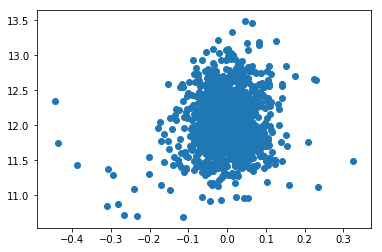

In [154]:
# We can check the heterosedascticity now which is prettey fine .
import matplotlib.pyplot as plt
plt.scatter(Y_train-Y_train_pred, Y_train_pred )

In [171]:
# finally let's predict the test data now 

Y_test_pred =  (.10 * lasso.predict(X_test_scaled)                + 
                 .10 * elastic_model.predict(X_test_scaled)       +  
                 .10*  ridge_model.predict(X_test_scaled)         +
                 .10 * GradientBoost_model.predict(X_test_scaled) + 
                 .10 * XGBoost_model.predict(X_test_scaled)       + 
                 .10 * LightGBM_model.predict(X_test_scaled)      + 
                 .40 * Stacking_model.predict(X_test_scaled) 
                 ) 
 
Y_test_pred_actual = np.expm1(Y_test_pred)



In [175]:
final_result = pd.DataFrame( { 'Id':amestestdf.index, 'SalePrice':Y_test_pred_actual })
final_result.to_csv("../final_result_submission.csv",index= False)


